# **Laboratorio 2**
**José Barrios - 20007192**

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse
import sys

## Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

Imagen original para el problema:

<img src="p1/stop.jpg">

In [36]:
def problema1(carpeta, imagen, resultado, umbral = 125, ver_resultado=True):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Crear salida de 0s y colocar 255s donde se sobrepase el umbral
    salida = np.zeros(img.shape)
    salida[img > umbral] = 255
    cv2.imwrite(carpeta + resultado, salida)
    
    #Ver resultado binarizado
    if(ver_resultado == True):
        imagen_salida = cv2.imread(carpeta + resultado)
        #imagen_salida = cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB)
        plt.imshow(imagen_salida)
        plt.show()

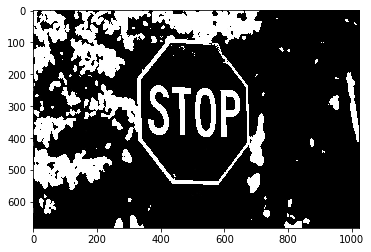

In [3]:
problema1("p1/", "stop.jpg", "resultado.jpg")

## Problema 2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasarla imagen a escala de grises y luego binarizarla.

In [54]:
def p2Aritmetica(carpeta, imagenA, imagenB, resultado, operacion):
    img_A = cv2.imread(carpeta + imagenA)
    img_B = cv2.imread(carpeta + imagenB)
    img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB)
    img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1,2,1), plt.imshow(img_A)
    plt.title("A")
    plt.xticks([]),plt.yticks([])
    
    plt.subplot(1,2,2), plt.imshow(img_B)
    plt.title("B")
    plt.xticks([]),plt.yticks([])
    plt.show()
    
    #Imagen de salida
    salida = np.zeros(img_A.shape)
    
    #Operar imagenes
    if(operacion == "SUMA"):
        salida = img_A + img_B
    elif(operacion == "RESTA"):
        salida = img_A - img_B
      
    cv2.imwrite(carpeta + resultado, salida)
    
    #Ver resultado binarizado
    imagen_salida = cv2.imread(carpeta + resultado)
    imagen_salida = cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB)
    plt.title(operacion)
    plt.imshow(imagen_salida)
    plt.show()

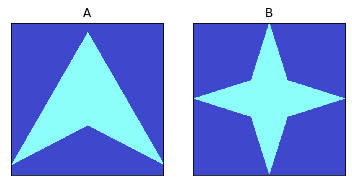

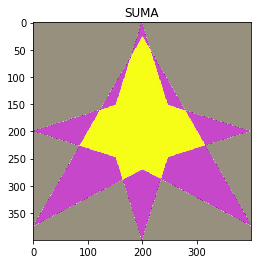

In [55]:
p2Aritmetica("p2/", "flecha.png", "estrella.png", "suma.jpg", "SUMA")

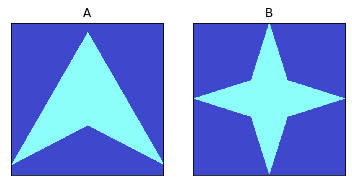

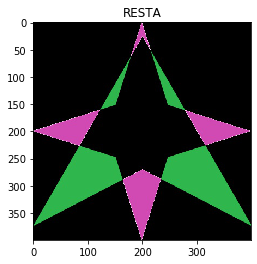

In [56]:
p2Aritmetica("p2/", "flecha.png", "estrella.png", "resta.jpg", "RESTA")

In [57]:
def p2Logica(carpeta, imagenA, imagenB, resultado, operacion):
    #Binarizar las imagenes primero
    problema1(carpeta, imagenA, "A.jpg", ver_resultado=False)
    problema1(carpeta, imagenB, "B.jpg", ver_resultado=False)

    #Recuperar las imagenes binarizadas y mostrarlas
    img_A = cv2.imread(carpeta + "A.jpg", 0)
    img_B = cv2.imread(carpeta + "B.jpg", 0)
    
    plt.subplot(1,2,1), plt.imshow(img_A, "gray")
    plt.title("A")
    plt.xticks([]),plt.yticks([])
    
    plt.subplot(1,2,2), plt.imshow(img_B, "gray")
    plt.title("B")
    plt.xticks([]),plt.yticks([])
    plt.show()
    
    #Imagen de salida
    salida = np.zeros(img_A.shape)
    
    #Operar imagenes
    if(operacion == "AND"):
        salida[((img_A == 255) & (img_B == 255))] = 255
    elif(operacion == "OR"):
        salida[((img_A == 255) | (img_B == 255))] = 255
    elif(operacion == "XOR"):
        salida[((img_A == 255) ^ (img_B == 255))] = 255
      
    cv2.imwrite(carpeta + resultado, salida)
    
    #Ver resultado binarizado
    imagen_salida = cv2.imread(carpeta + resultado)
    plt.title(operacion)
    plt.imshow(imagen_salida)
    plt.show()

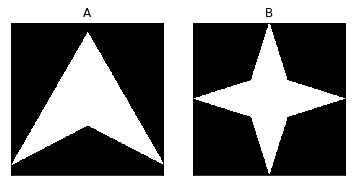

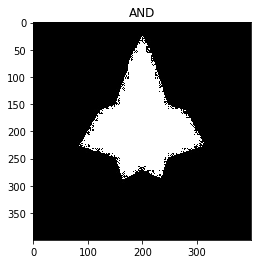

In [58]:
p2Logica("p2/", "flecha.png", "estrella.png", "and.jpg", "AND")

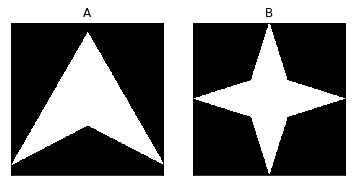

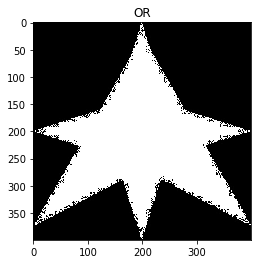

In [59]:
p2Logica("p2/", "flecha.png", "estrella.png", "or.jpg", "OR")

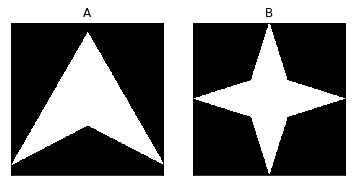

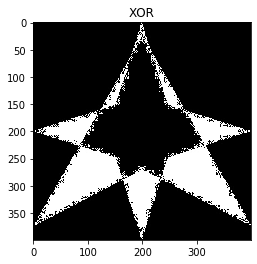

In [60]:
p2Logica("p2/", "flecha.png", "estrella.png", "xor.jpg", "XOR")

## Problema 3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

Imagen original para el problema:

<img src="p3/face.jpg">

In [47]:
def problema3(carpeta, imagen):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Desplegar en 3D
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    fig = plt.figure(figsize = (15, 15))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(80, 30)
    plt.show()   

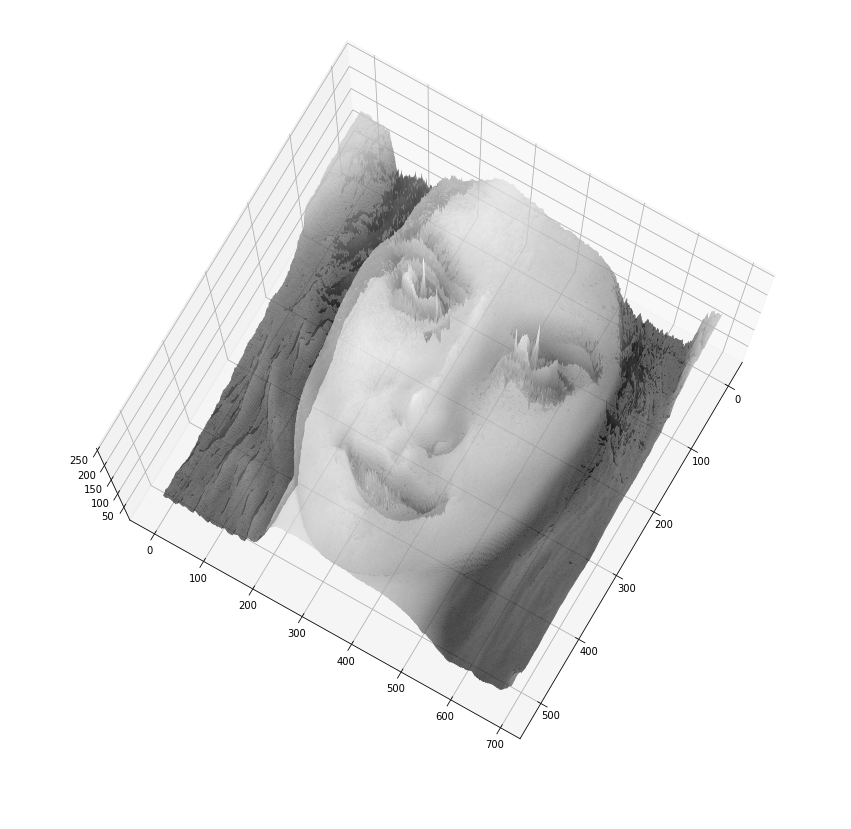

In [49]:
problema3("p3/", "face.jpg")

## Problema 4
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

Imagen a usar para el problema:

<img src="p4/chess.jpg">

In [9]:
def p4Negativa(carpeta, imagen):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Imagen de salida
    salida = 255 - img
    cv2.imwrite(carpeta + "negativa.jpg", salida)
    
    #Ver resultado
    imagen_salida = cv2.imread(carpeta + "negativa.jpg")
    plt.title("Negativa")
    plt.imshow(imagen_salida)
    plt.show()
    

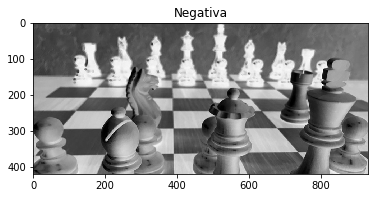

In [10]:
p4Negativa("p4/", "chess.jpg")

In [25]:
def p4Lineal(carpeta, imagen):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    r1 = 80
    s1 = 0
    r2 = 175
    s2 = 255

    #pendientes de las rectas
    a = (s1/r1)
    b = (s2-s1)/(r2-r1)
    c = (255-s2)/(255-r2)

    #definición de las rectas
    x1 = np.array(range(r1))
    y1 = a * x1

    x2 = np.array(range(r1,r2+1))
    y2 = b * (x2 - r1) + a * r1

    x3 = np.array(range(r2, 256))
    y3 = c * (x3 - r2) + b * (r2 - r1) + a * r1


    ancho, alto = img.shape
    salida = np.zeros((ancho, alto), np.uint8)

    #asigno los nuevos valores que tendrá la imagen de salida
    for i in range(ancho):
        for j in range(alto):
            if(img[i, j] >= 0 and img[i, j] <= r1):
                salida[i, j] = a * img[i, j]

            elif(img[i, j] > r1 and img[i, j] <= r2):
                salida[i, j] = b * ((img[i, j] - r1) + (a * r1))

            else:
                if(img[i, j] > r2 and img[i, j] <= 255):
                    salida[i, j] = c * (img[i, j] - r2) + b * (r2 - r1) + a * r1
    
    #Imagen de salida
    #salida = m * img + b
    cv2.imwrite(carpeta + "lineal.jpg", salida)
    
    #Ver resultado
    imagen_salida = cv2.imread(carpeta + "lineal.jpg")
    plt.title("Lineal")
    plt.imshow(imagen_salida)
    plt.show()

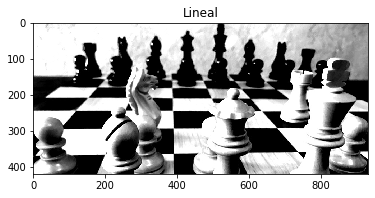

In [26]:
p4Lineal("p4/", "chess.jpg")

In [20]:
def p4Logaritmica(carpeta, imagen):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Constante C
    C = 255 / np.log1p(img.max())
    
    #Imagen de salida
    salida = C * np.log1p(np.double(img))
    cv2.imwrite(carpeta + "log.jpg", salida)
    
    #Ver resultado
    imagen_salida = cv2.imread(carpeta + "log.jpg")
    plt.title("Logarítmica")
    plt.imshow(imagen_salida)
    plt.show()

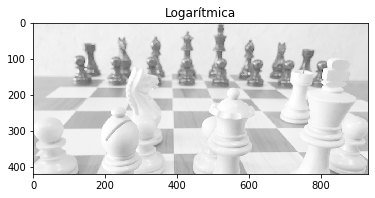

In [21]:
p4Logaritmica("p4/", "chess.jpg")

In [46]:
def p4Exponencial(carpeta, imagen, gamma):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    C = 255 / np.power(255, gamma)
    
    #Imagen de salida
    salida =  C * np.power(img, gamma)
    cv2.imwrite(carpeta + "exp.jpg", salida)
    
    #Ver resultado
    imagen_salida = cv2.imread(carpeta + "exp.jpg")
    plt.title("Exponencial")
    plt.imshow(imagen_salida)
    plt.show()

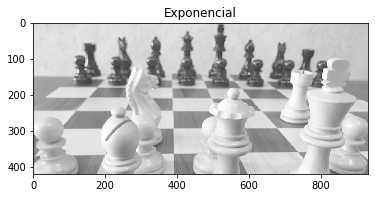

In [53]:
p4Exponencial("p4/", "chess.jpg", 0.4)

## Problema extra 1
Desarrolle una función que dada una imagen a color y kernel de cualquier dimensión (3x3, 5x5,7x7, 9x9, 11x11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtrode convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

## Problema extra 2
Implemente una función que sugiera si una imagen en escala de grises requiere o no la ecualización de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significar ́ıa que la imagen no requiere ecualización y 1 significaría que la imagen requiere ecualización fuertemente, si el valor es mayor a 0.5 su función debe realizar la ecualización de histograma vista en clase.